In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [10]:
## reading stock market price from the internet
import pandas_datareader as pdr
from pandas_datareader import DataReader

In [4]:
from datetime import datetime

In [5]:
tech_list= ['AAPL', "GOOG",'MSFT',"AMZN"]

In [6]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [12]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [13]:
AAPL.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-23,57.125000,53.152500,57.020000,56.092499,336752800.0,55.661041
2020-03-24,61.922501,58.575001,59.090000,61.720001,287531200.0,61.245258
2020-03-25,64.562500,61.075001,62.687500,61.380001,303602000.0,60.907871
2020-03-26,64.669998,61.590000,61.630001,64.610001,252087200.0,64.113029
2020-03-27,63.967499,61.762501,63.187500,61.935001,204216800.0,61.458603
2020-03-30,63.880001,62.349998,62.685001,63.702499,167976400.0,63.212502
2020-03-31,65.622498,63.000000,63.900002,63.572498,197002000.0,63.083504
2020-04-01,62.180000,59.782501,61.625000,60.227501,176218400.0,59.764240
2020-04-02,61.287498,59.224998,60.084999,61.232498,165934000.0,60.761501


In [14]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,108.507322,105.504653,107.084474,107.058076,1.404871e+08,106.737247
std,22.679017,22.046827,22.537603,22.320401,5.570507e+07,22.441445
min,57.125000,53.152500,57.020000,56.092499,4.669130e+07,55.661041
25%,89.683748,87.783749,88.573128,88.358126,1.014524e+08,87.915823
50%,116.475002,113.560001,115.030003,115.045002,1.274332e+08,114.675503
75%,125.432499,121.615000,124.122501,124.084999,1.664242e+08,123.975412
max,145.089996,141.369995,143.600006,143.160004,3.743368e+08,142.946396


In [15]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-03-23 to 2021-03-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


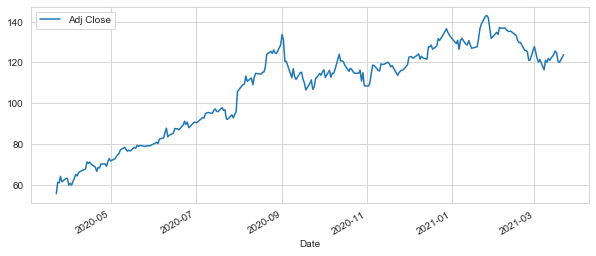

In [17]:
## plotting adjusted closing price (The adjusted closing price amends a stock's
## closing price to reflect that stock's value after accounting for any corporate 
## actions. The closing price is the raw price, which is just the cash value of the
## last transacted price before the market closes.)

AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

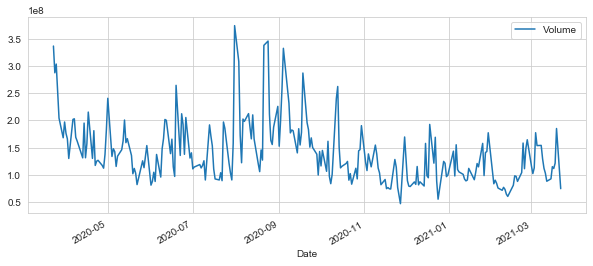

In [20]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [24]:
## MA : Moving Average

ma_day= [10,20,50]

for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    AAPL[column_name]= AAPL['Adj Close'].rolling(ma).mean()

In [27]:
AAPL.head(50)

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2020-03-23,57.125000,53.152500,57.020000,56.092499,336752800.0,55.661041,NaN,NaN,NaN
2020-03-24,61.922501,58.575001,59.090000,61.720001,287531200.0,61.245258,NaN,NaN,NaN
2020-03-25,64.562500,61.075001,62.687500,61.380001,303602000.0,60.907871,NaN,NaN,NaN
2020-03-26,64.669998,61.590000,61.630001,64.610001,252087200.0,64.113029,NaN,NaN,NaN
2020-03-27,63.967499,61.762501,63.187500,61.935001,204216800.0,61.458603,NaN,NaN,NaN
2020-03-30,63.880001,62.349998,62.685001,63.702499,167976400.0,63.212502,NaN,NaN,NaN
2020-03-31,65.622498,63.000000,63.900002,63.572498,197002000.0,63.083504,NaN,NaN,NaN
2020-04-01,62.180000,59.782501,61.625000,60.227501,176218400.0,59.764240,NaN,NaN,NaN
2020-04-02,61.287498,59.224998,60.084999,61.232498,165934000.0,60.761501,NaN,NaN,NaN


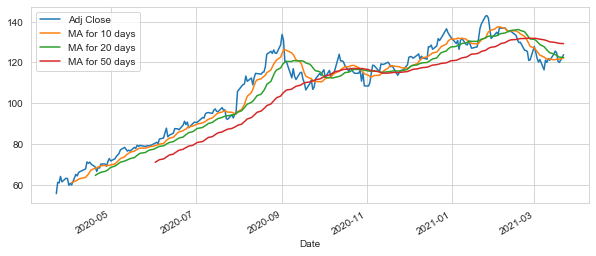

In [28]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

In [31]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

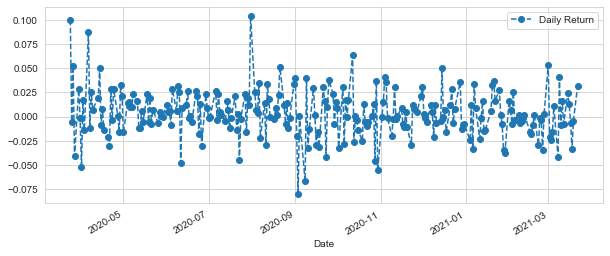

In [34]:
AAPL['Daily Return'].plot(legend=True,figsize=(10,4),linestyle='--', marker='o')

sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='red')

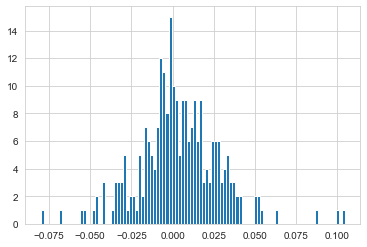

In [42]:
AAPL['Daily Return'].hist(bins=100)

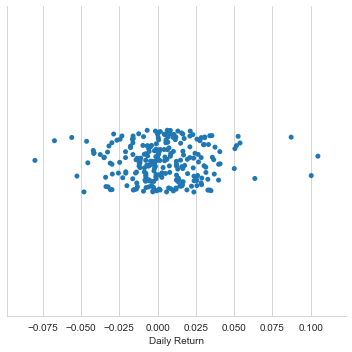

In [45]:
sns.catplot('Daily Return',data=AAPL)

In [46]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [47]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-03-23,55.661041,1056.619995,134.612076,1902.829956
2020-03-24,61.245258,1134.459961,146.847717,1940.099976
2020-03-25,60.907871,1102.489990,145.442017,1885.839966
2020-03-26,64.113029,1161.750000,154.539566,1955.489990
2020-03-27,61.458603,1110.709961,148.194046,1900.099976


In [48]:
## Tech Returns
tech_rets = closing_df.pct_change()

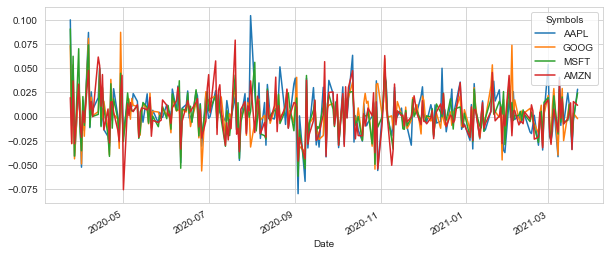

In [50]:
tech_rets.plot(subplots=False,figsize=(10,4))

In [57]:
import scipy.stats as stat

/Users/ozlemniksch/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


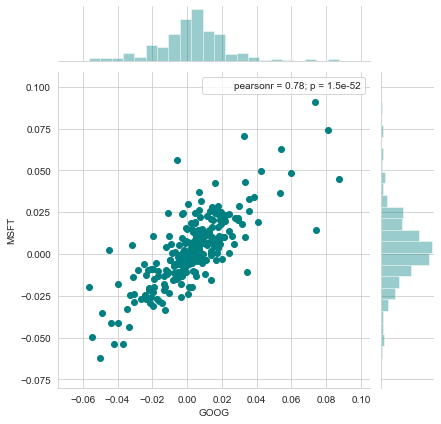

In [58]:
## Compare two different stocks
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='teal',stat_func=stat.pearsonr)

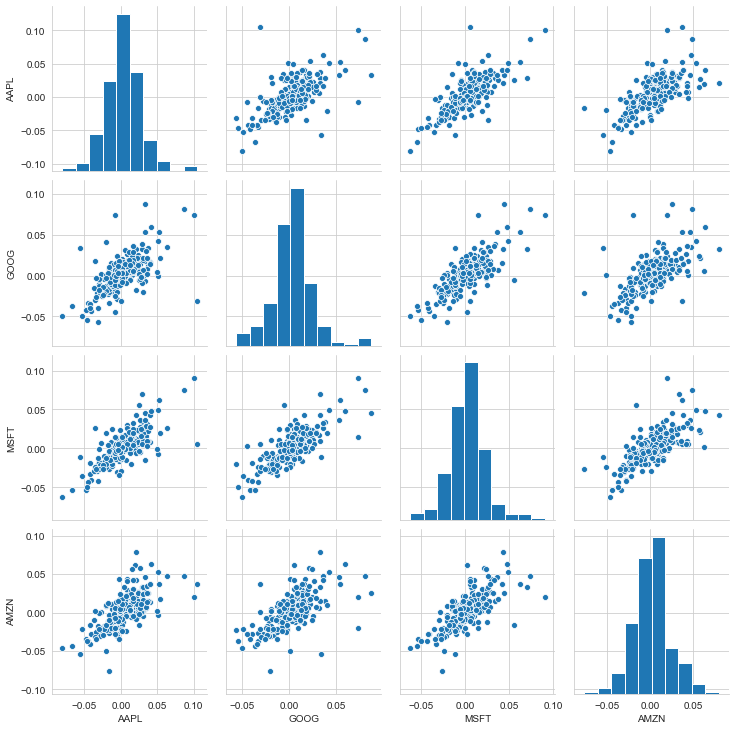

In [60]:
sns.pairplot(tech_rets)

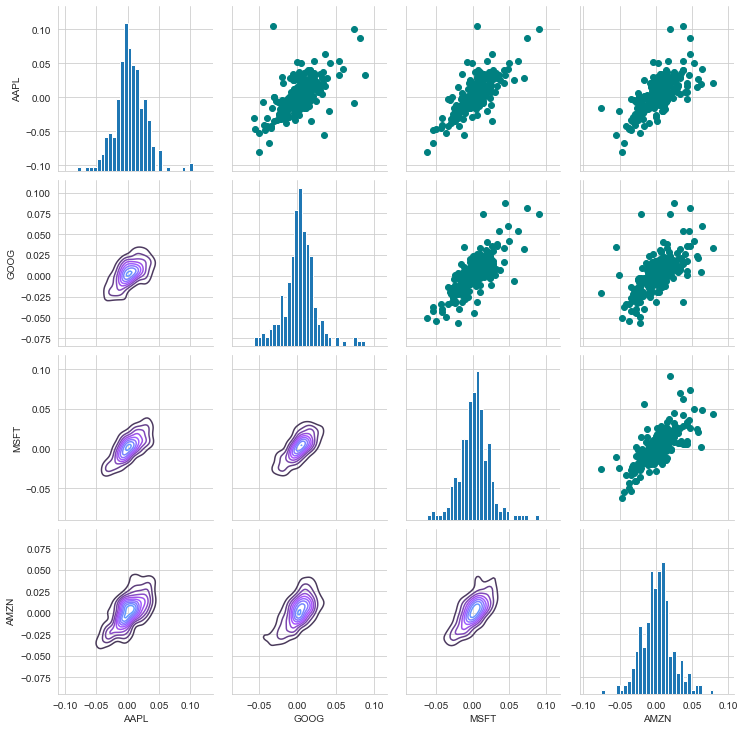

In [62]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='teal')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

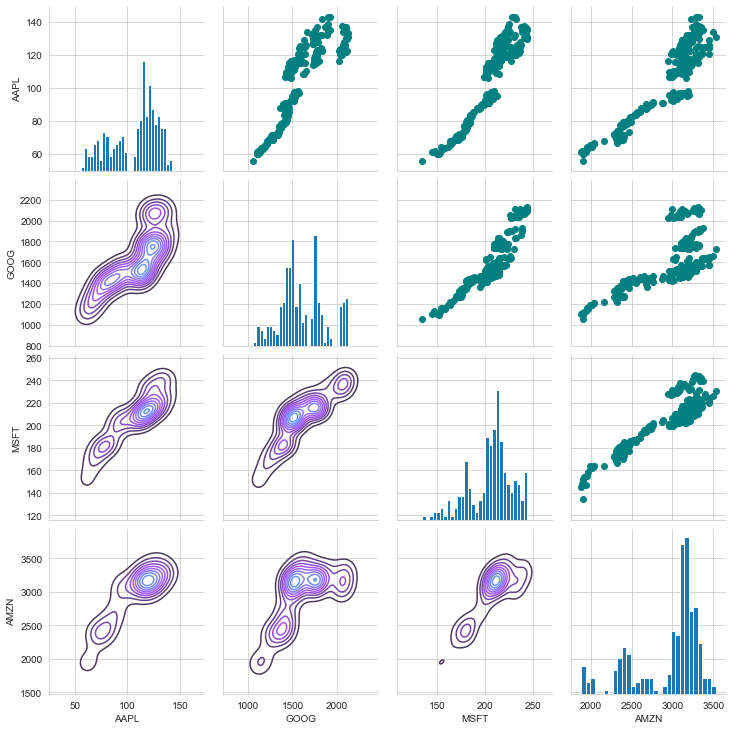

In [63]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='teal')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

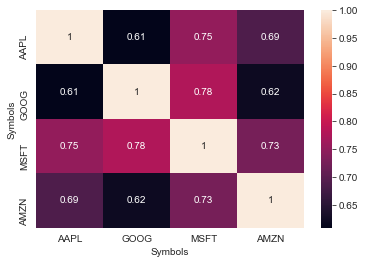

In [66]:
sns.heatmap(data=tech_rets.corr(), annot=True)

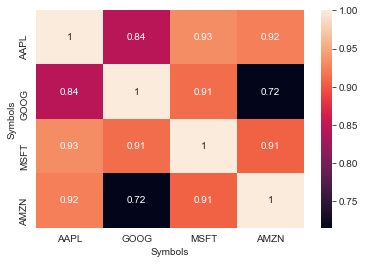

In [68]:
sns.heatmap(data=closing_df.corr(),annot=True)

### Risk Analysis

One of the most basic ways to check risk is  comparing the expected return with standard deviation of the daily returns

In [69]:
rets = tech_rets.dropna()

In [70]:
area = np.pi*20

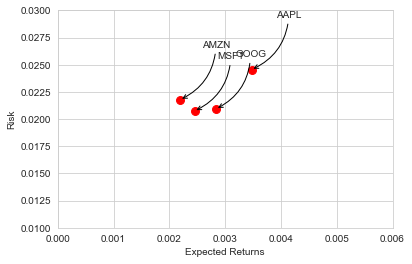

In [97]:
plt.scatter(rets.mean(),rets.std(),s=area,color='red')

plt.xlabel('Expected Returns')
plt.ylabel('Risk')

plt.ylim([0.01,0.03])
plt.xlim([0,0.006])

# Label the scatter plots, for more info on how this is done, check out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=-0.3',color='black'))

In [98]:
rets['AAPL'].quantile(0.05)

-0.034343869051286446

Above code means that our highest lose with Apple stock will not be more than %0.03 %95 of the time

### Value at Risk - Monte Carlo Method

In [99]:
days = 365

dt = 1/days

mu = rets.mean()["GOOG"]

sigma = rets.std()["GOOG"]

In [100]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        ## choosing epsilon value with random, epsilon can change from case to case
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        price[x] = price[x-1] + (price[x-1]* (drift[x] + shock[x]))
        
    return price

In [101]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-23,1071.319946,1013.536011,1061.319946,1056.619995,4044100,1056.619995
2020-03-24,1135.000000,1090.619995,1103.770020,1134.459961,3344500,1134.459961
2020-03-25,1148.900024,1086.010010,1126.469971,1102.489990,4081500,1102.489990
2020-03-26,1169.969971,1093.530029,1111.800049,1161.750000,3571700,1161.750000
2020-03-27,1150.670044,1105.910034,1125.670044,1110.709961,3208500,1110.709961


In [102]:
## start price for Google will be first opening price
start_price = GOOG['Open'][0]

In [103]:
start_price

1061.3199462890625

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

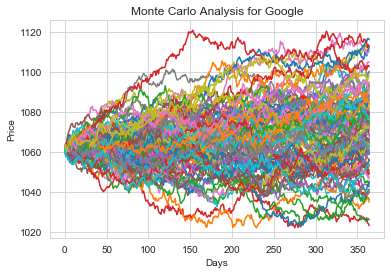

In [104]:
## We will run the monte carlo method 100 times and plot

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title("Monte Carlo Analysis for Google")

In [105]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

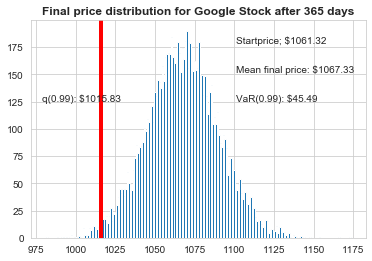

In [106]:
q = np.percentile(simulations,1)

plt.hist(simulations, bins=200)

# Starting Price
plt.figtext(0.6,0.8,s ="Startprice; $%.2f" %start_price)

# Mean ending price
plt.figtext(0.6,0.7, "Mean final price: $%.2f" %simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, "VaR(0.99): $%.2f" %(start_price - q))

# Display 1% quantile
plt.figtext(0.15,0.6,'q(0.99): $%.2f' %q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title("Final price distribution for Google Stock after %s days" % days, weight='bold')

this histogram shows that %99 of the time our lose will at MOST $45.49. And if we are looking for the Start Price and Mean Final Price Google stocks are pretty stable. (Double check with the rick analysis table, it was so close to 0 )